# Numpy arrays (review)


Remember to import the library

In [1]:
import numpy as np

Creating numpy arrays:

In [2]:
X = np.array([[1,2,3],[4,5,6]])  
print "nice array:"
print X
print "shape was:", X.shape
X = np.zeros([3,3]) # the shape is given as a list
print "zeros:"
print X 

nice array:
[[1 2 3]
 [4 5 6]]
shape was: (2, 3)
zeros:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


Accessing and setting elements of numpy arrays:

In [3]:
X[0,1] = 999
print X

[[   0.  999.    0.]
 [   0.    0.    0.]
 [   0.    0.    0.]]


Make a 1x9 array into a 3x3 array:


In [4]:
X = np.array(range(9))
np.reshape(X, (3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

... or one can do: 

In [5]:
X = np.array(range(9))
X.reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Array of evenly distributed numbers: 

In [6]:
np.linspace(0,1,11)   # 11 points between 0 and and 1 inclusive

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

We also spoke about how numpy makes it easy to combine arrays with different shapes (dimensions): 

In [7]:
X = np.array(range(9))
print X
print X + 10

[0 1 2 3 4 5 6 7 8]
[10 11 12 13 14 15 16 17 18]


... the number `10` is broadcast into a one-dimensional array of the same size as `X` and then combined with it elementwise. 

Here's another example of elementwise arithmetic: 

In [8]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

We also spoke about how numpy allows you to apply functions, e.g. `sum`, to sub-arrays of a given array: 

In [9]:
arr = np.array(range(9)).reshape(3,3) + 1
print arr

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [10]:
np.sum(arr)

45

In [11]:
np.apply_along_axis(np.sum, 0, arr)

array([12, 15, 18])

In [12]:
np.apply_along_axis(np.sum, 1, arr)

array([ 6, 15, 24])

# Plotting with Matplotlib (review)

This is very similar to Matlab's plotting functions, and is best used with numpy: 

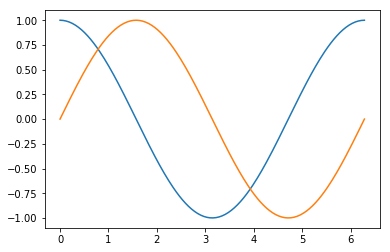

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import math 

xs = np.linspace(0, 2*math.pi, 200)
ys = np.cos(xs)   
zs = np.sin(xs)

plt.plot(xs, ys)
plt.plot(xs, zs)

In [14]:
# alternatively, we could have tried:  
ys = math.cos(xs) 

TypeError: only length-1 arrays can be converted to Python scalars

What happened? `math.cos` cannot swallow an array (but `np.cos` can). We can make `math.cos` do so by 'vectorizing' it: 

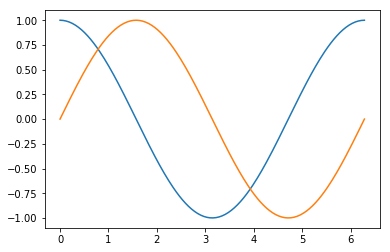

In [15]:
ys = np.vectorize(math.cos)(xs)
plt.plot(xs, ys)
plt.plot(xs, zs)

# Pictures and the Faces Dataset:

Now that we know `numpy` and `matplotlib`, let's get our hands dirty with them.

Load the faces dataset:

In [16]:
X = np.genfromtxt("faces.txt", delimiter=None) 

In [17]:
type(X)

numpy.ndarray

In [18]:
X.shape

(4916, 576)

There are 4916 rows, 576 columns. Each row is actually a 24x24 image: 

In [19]:
24*24 == 576

True

Reshape a row into a 2D array, representing the pixels in an image: 

In [20]:
im = X[0].reshape(24,24)

Plot the image using Matplotlib: 

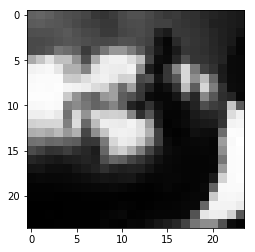

In [21]:
plt.imshow(im, cmap="gray")

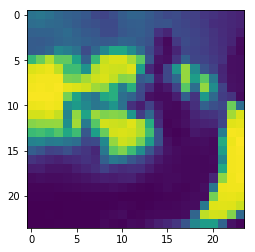

In [22]:
plt.imshow(im)

The image is sideways. If we transpose the matrix that represents the image, then hopefully the image will be the right-way up: 

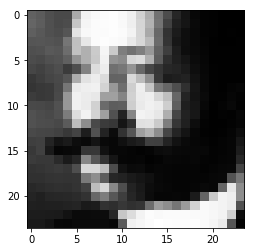

In [23]:
plt.imshow(im.transpose(), cmap="gray", interpolation = "none")

Another way to transpose a matrix is: 

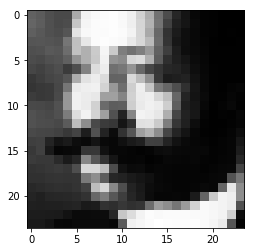

In [24]:
plt.imshow(im.T, cmap="gray", interpolation = "none")

If presented with a vectorized representation of a new image in the dataset, we would have to repeat this sequence of operations to visualize it. Rather than duplicate the code we wrote above, it is better practice to put it into a function and simply call that function on the new vector: 

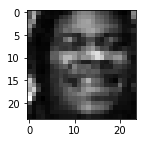

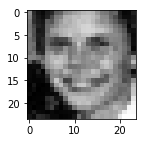

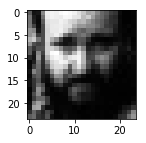

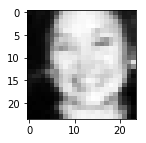

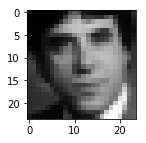

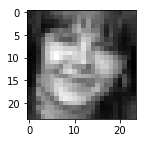

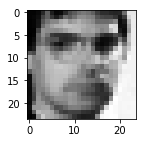

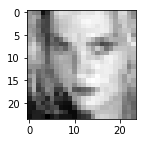

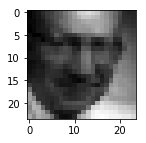

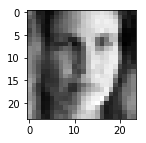

In [25]:
def showimg(imvec):
    plt.figure(figsize=(2,2))
    img = np.reshape(imvec,(24,24))
    plt.imshow(img.T, cmap="gray")
    
startface = 50
for i in range(startface, startface+10):
    showimg(X[i,:])

### Average Face

Recall that `X` represents a set of face images. `X` is a numpy array where each row corresponds to an image. Each column corresponds to a particular pixel in the image. 

What would happen if, for each column, we average along the rows? This ought to create a new image in which the value of each pixel is an average of the values of corresponding pixels in all the images. 



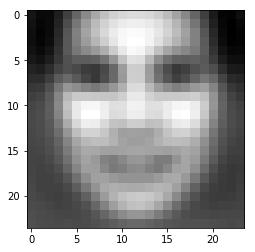

In [26]:
avg_face = np.apply_along_axis(np.mean, 0, X) # axis 0 is the first axis
avg_face_image = np.reshape(avg_face, (24, 24))
plt.imshow(avg_face_image.transpose(), cmap="gray")

We can smooth this image out using an interpolation function, which simply specifies a way to replace each pixel value with some combination of neighboring pixel values: 

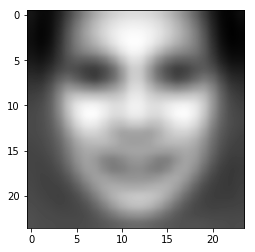

In [27]:
plt.imshow(avg_face_image.transpose(), cmap="gray", interpolation='gaussian')

Woah! Spooky!